In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
data = pd.read_csv("shopping_behavior_updated.csv")

In [182]:
data

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


### Analysing the dataset

In [183]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [184]:
data.shape

(3900, 18)

In [185]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [187]:
data.rename(columns={'Item Purchased': 'Item', 'Review Rating': 'Rating'}, inplace=True)

,Customer ID,Age,Gender,Item,Category,Purchase Amount (USD),Location,Size,Color,Season,Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [188]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item                      0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Rating                    0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [189]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## data Preprocessing 

In [190]:
gender = {'Male': 1, 'Female': 0}
data['Gender'] = data['Gender'].map(gender)



In [191]:
Subscription_status = {"Yes":1, "No": 0}
data["Subscription Status"] = data["Subscription Status"].map(Subscription_status)

In [175]:
unique_promo_code_values = data["Promo Code Used"].unique()
print(unique_promo_code_values)


['Yes' 'No']


In [192]:
data

,Customer ID,Age,Gender,Item,Category,Purchase Amount (USD),Location,Size,Color,Season,Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,1,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,1,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,1,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,1,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,1,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,0,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,0,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,0,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,0,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,0,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,0,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,0,Express,No,No,24,Venmo,Weekly


In [12]:
data["Category"].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

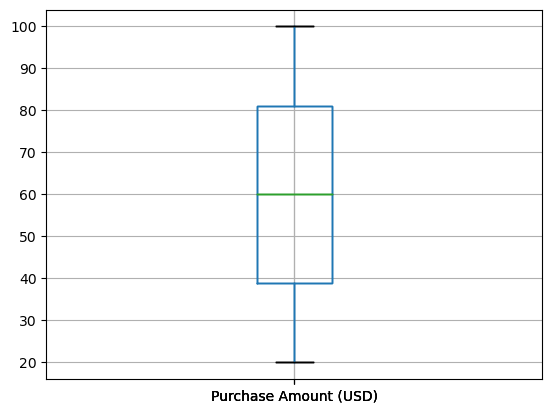

In [54]:
data.boxplot(column="Purchase Amount (USD)")
plt.show()

In [14]:
data.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_28644\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Customer ID,Age,Purchase Amount (USD),Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


## Que1:- what will be the average purchase amount for each category?

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


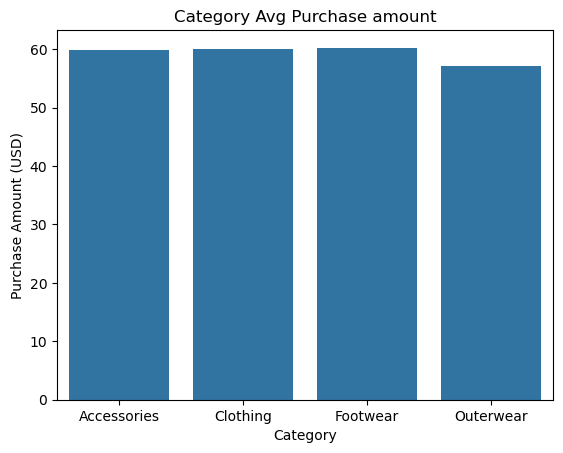

In [55]:
Category_Avg_purchase = data.groupby("Category")["Purchase Amount (USD)"].mean()
print(Category_Avg_purchase)
sns.barplot(x= category_avg_purchase.index, y=Category_Avg_purchase.values)
plt.title("Category Avg Purchase amount")
plt.xlabel("Category")
plt.ylabel("Purchase Amount (USD)")
plt.show()

## Que2:- What is the Purchase Amount  for customers with and without a Subscription status?

In [66]:
print(data.groupby("Subscription Status")["Purchase Amount (USD)"].mean())
print(data.groupby("Subscription Status")["Purchase Amount (USD)"].sum())
print(data.groupby("Subscription Status")["Rating"].mean())


Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64
Subscription Status
No     170436
Yes     62645
Name: Purchase Amount (USD), dtype: int64
Subscription Status
No     3.752722
Yes    3.742450
Name: Rating, dtype: float64


## Que3:- which Payment method commonly used

In [101]:
most_used_payment_method = data["Payment Method"].mode().values[0]

print(f"The most commonly used payment method for purchases is: {most_used_payment_method}")


The most commonly used payment method for purchases is: PayPal


## Que4:- season wise which category have most purchased 

Season  Category   
Fall    Accessories    19874
        Clothing       26220
        Footwear        8665
        Outerwear       5259
Spring  Accessories    17007
        Clothing       27692
        Footwear        9555
        Outerwear       4425
Summer  Accessories    19028
        Clothing       23078
        Footwear        9393
        Outerwear       4278
Winter  Accessories    18291
        Clothing       27274
        Footwear        8480
        Outerwear       4562
Name: Purchase Amount (USD), dtype: int64


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

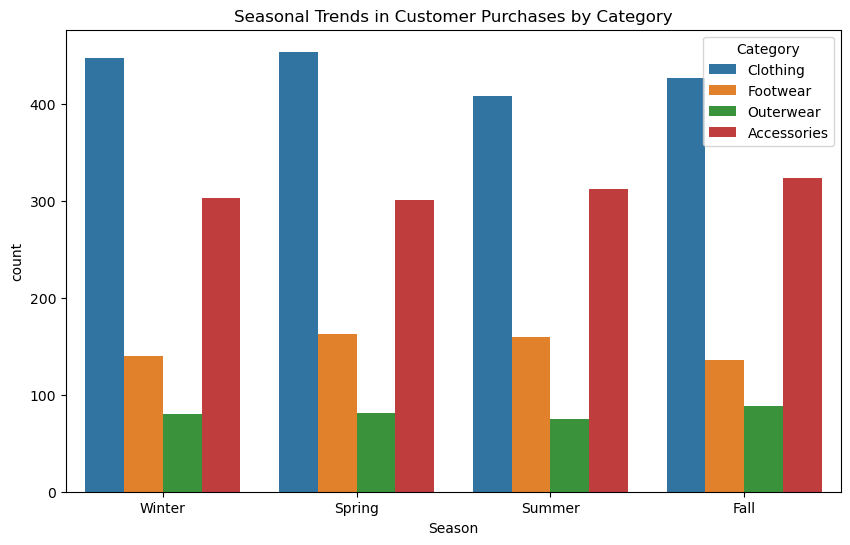

In [110]:
season_category_counts = data.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum()
print(season_category_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x="Season", data=data, hue="Category")
plt.title("Seasonal Trends in Customer Purchases by Category")

plt.show()


## Que5:- location wise Subscription Status 

Subscription Status  No  Yes
Location                    
Alabama              67   22
Alaska               54   18
Arizona              49   16
Arkansas             59   20
California           66   29
Colorado             54   21
Connecticut          62   16
Delaware             58   28
Florida              47   21
Georgia              56   23
Hawaii               46   19
Idaho                74   19
Illinois             70   22
Indiana              58   21
Iowa                 48   21
Kansas               55    8
Kentucky             53   26
Louisiana            59   25
Maine                58   19
Maryland             66   20
Massachusetts        49   23
Michigan             57   16
Minnesota            62   26
Mississippi          59   21
Missouri             54   27
Montana              71   25
Nebraska             62   25
Nevada               57   30
New Hampshire        54   17
New Jersey           51   16
New Mexico           59   22
New York             66   21
North Carolina

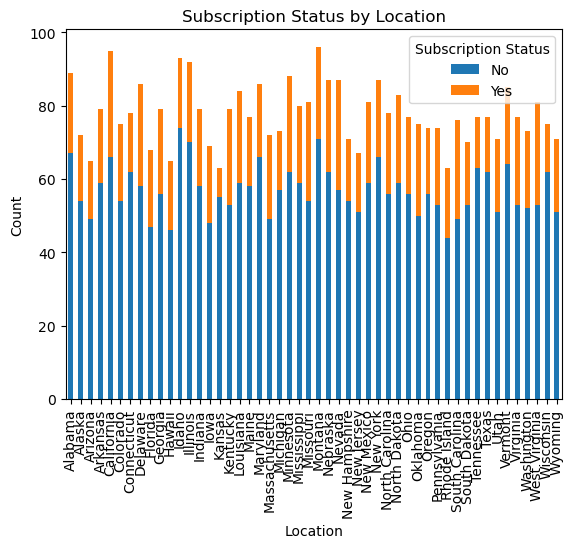

In [72]:
location_subscription_counts = data.groupby(["Location", "Subscription Status"]).size().unstack().fillna(0)
# Group the data by "Location" and "Subscription Status" and calculate the counts.

location_subscription_counts.plot(kind="bar", stacked=True)
print(location_subscription_counts)
plt.title("Subscription Status by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Subscription Status")
plt.show()


## Que6:- Relationship Between Discount Applied and Payment Method

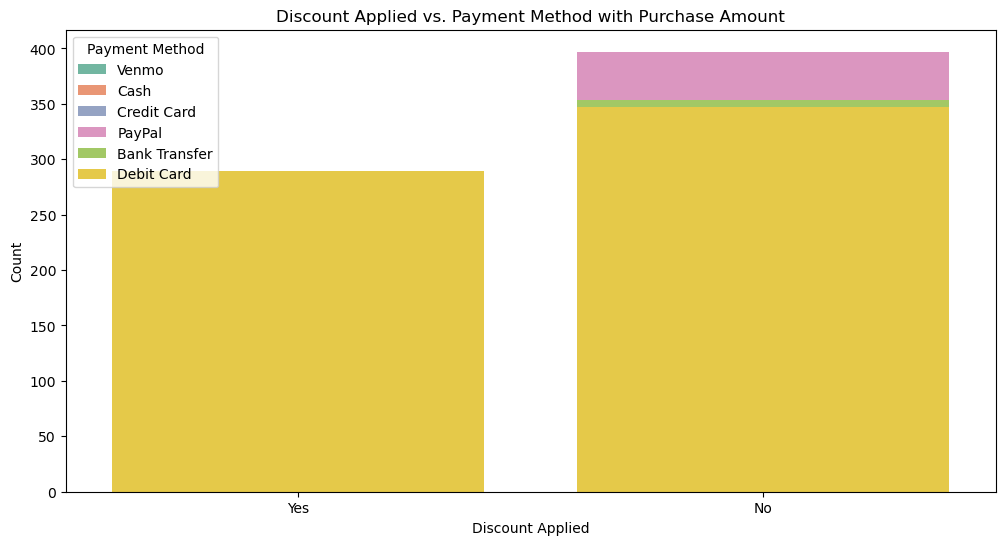

In [126]:
plt.figure(figsize=(12, 6))

sns.countplot(x="Discount Applied", data=data, hue="Payment Method", palette="Set2", dodge=False)
plt.title("Discount Applied vs. Payment Method with Purchase Amount")
plt.xlabel("Discount Applied")
plt.ylabel("Count")

plt.show()


## Que7:- Which Shipping type most people Prefered .

In [74]:
data["Shipping Type"].value_counts()


Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: Shipping Type, dtype: int64

## Que8:- What is the Total and Avg Purchase Amount for each frequency of Purchases.

In [124]:
average_purchase_by_frequency = data.groupby("Frequency of Purchases")["Purchase Amount (USD)"].mean()
Total_Purchase_by_Frequency = data.groupby("Frequency of Purchases")["Purchase Amount (USD)"].sum()

print(average_purchase_by_frequency)
print(Total_Purchase_by_Frequency)

Frequency of Purchases
Annually          60.173077
Bi-Weekly         60.694698
Every 3 Months    60.082192
Fortnightly       59.053506
Monthly           59.330922
Quarterly         59.984014
Weekly            58.972171
Name: Purchase Amount (USD), dtype: float64
Frequency of Purchases
Annually          34419
Bi-Weekly         33200
Every 3 Months    35088
Fortnightly       32007
Monthly           32810
Quarterly         33771
Weekly            31786
Name: Purchase Amount (USD), dtype: int64


## Que9:- Which Size mostly prefer by Man and women 

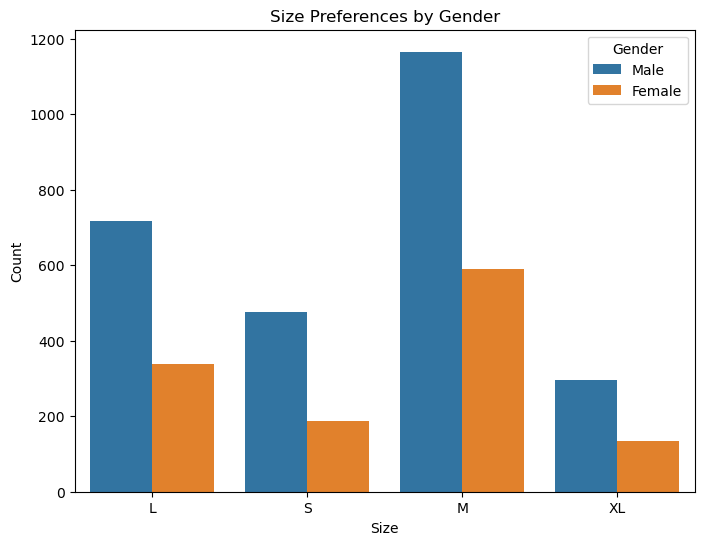

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Size', data=data, hue='Gender')
plt.title("Size Preferences by Gender")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()


## Que10:- Which Colour mostly prefer when People Purchased clothes?

C:\Users\HP\AppData\Local\Temp\ipykernel_28644\3479441401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Color', data=most_popular_color_by_category, palette='Set3')


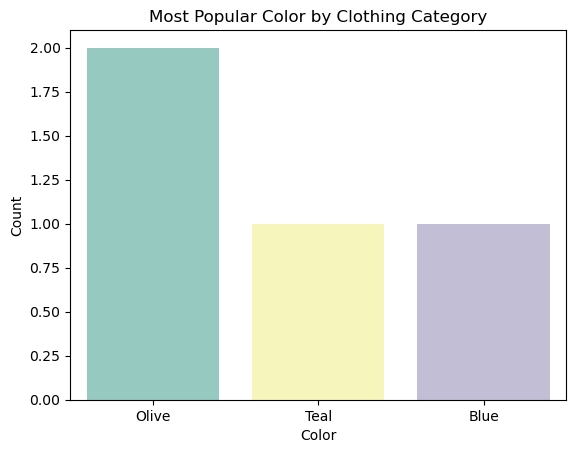

In [25]:
most_popular_color_by_category = data.groupby('Category')['Color'].agg(lambda x: x.mode().iloc[0]).reset_index()

sns.countplot(x='Color', data=most_popular_color_by_category, palette='Set3')
plt.title('Most Popular Color by Clothing Category')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()


## Que11:- Location wise which gender did more Shopping

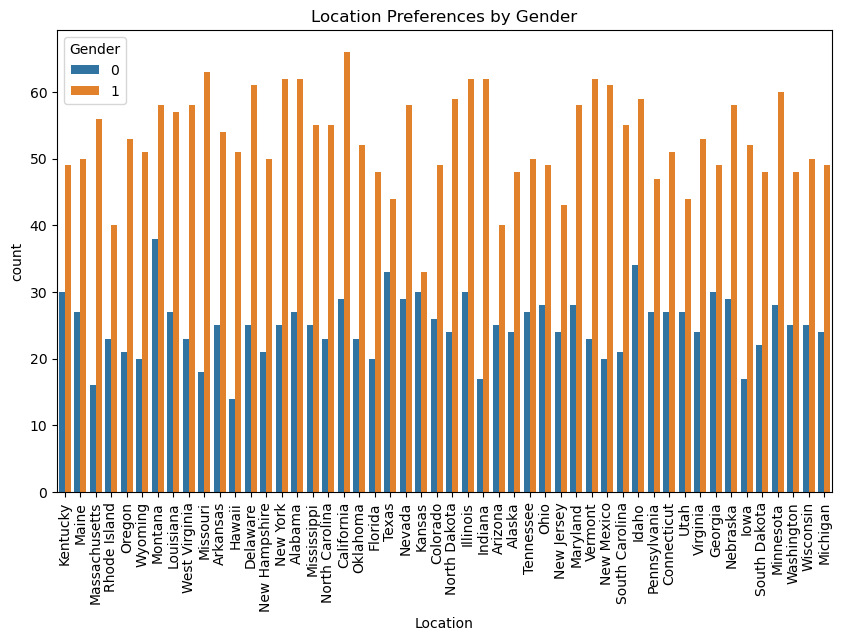

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=data, hue='Gender')
plt.title("Location Preferences by Gender")
plt.xticks(rotation=90)
plt.show()



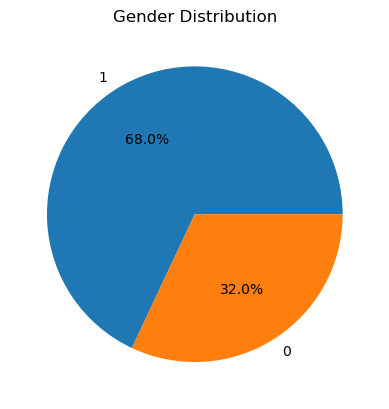

In [127]:
gender_distribution = data['Gender'].value_counts()

plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

## Que12:- most of the time Which Category Purchased by the people when they used there promo code.

In [193]:
promo_used_data = data[data['Promo Code Used'] == 'Yes']

most_common_category_with_promo = promo_used_data['Category'].mode().values[0]

print("Most Common Category Purchased with Promo Code:", most_common_category_with_promo)


Most Common Category Purchased with Promo Code: Clothing


## Que13:- Which Colour mostly Preferred by season wise.

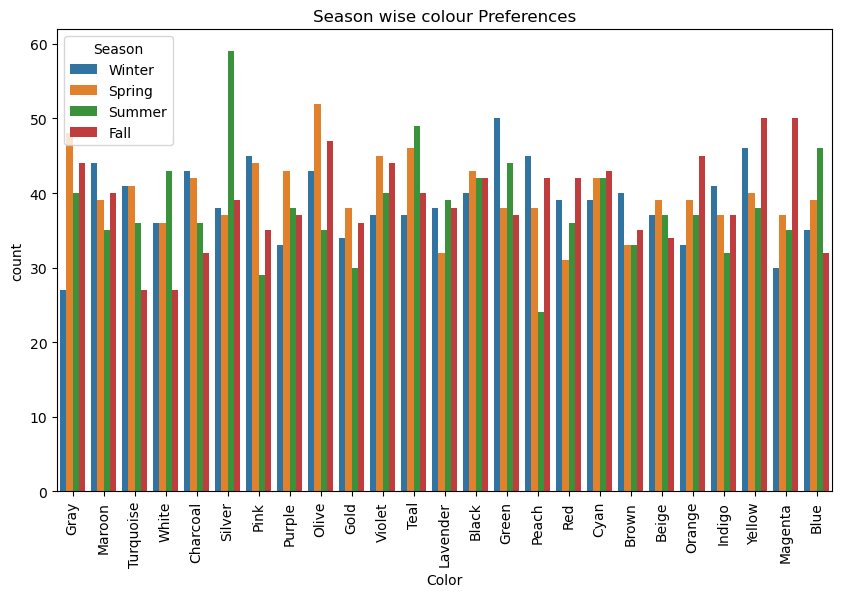

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Color', data=data, hue='Season')
plt.title("Season wise colour Preferences")
plt.xticks(rotation=90)
plt.show()


## Que14:- Which category have most rating

Category with the Most Ratings: Footwear
Highest Average Rating: 3.790651085141903


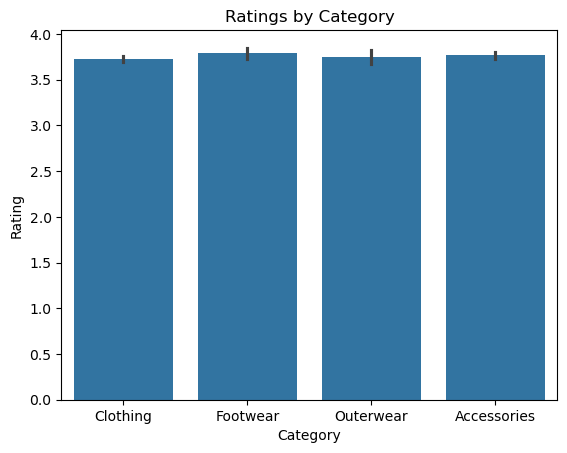

In [165]:
category_ratings = data.groupby('Category')['Rating'].mean()
most_rated_category = category_ratings.idxmax()
highest_average_rating = category_ratings.max()

print("Category with the Most Ratings:", most_rated_category)
print("Highest Average Rating:", highest_average_rating)

sns.barplot(x='Category', y='Rating', data=data)
plt.title("Ratings by Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()


## Que15:- Which Season people are do more Shopping?

Season with the Most Shopping: Spring
Total Purchases in the Most Shopped Season: 999


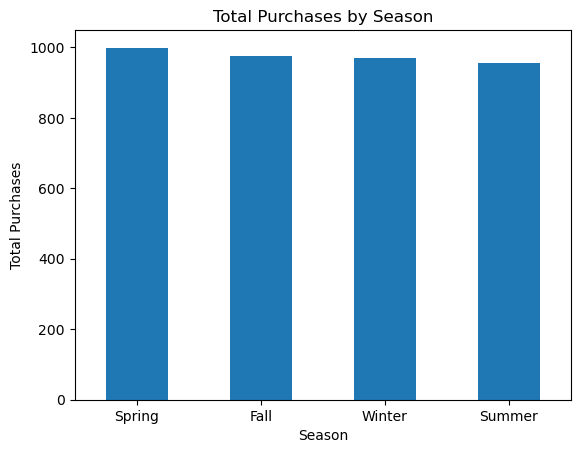

In [164]:
season_purchase_counts = data['Season'].value_counts()
most_shopped_season = season_purchase_counts.idxmax()
total_purchases_in_most_shopped_season = season_purchase_counts.max()

print("Season with the Most Shopping:", most_shopped_season)
print("Total Purchases in the Most Shopped Season:", total_purchases_in_most_shopped_season)


season_purchase_counts = data['Season'].value_counts()
season_purchase_counts.plot(kind='bar')
plt.title("Total Purchases by Season")
plt.xlabel("Season")
plt.ylabel("Total Purchases")
plt.xticks(rotation=0)
plt.show()



## Que16:- During Footwear Purchasing Which size mostly Preferred by Customer?

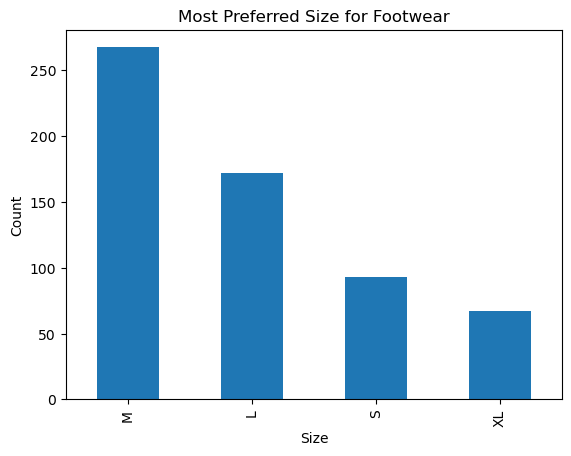

In [33]:
footwear_data = data[data['Category'] == 'Footwear']
most_preferred_size = footwear_data['Size'].value_counts().idxmax()
footwear_data['Size'].value_counts().plot(kind='bar')
plt.title(f"Most Preferred Size for Footwear")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()


## Que17:- Top 5 Colours Mostly Preferred by Women's.

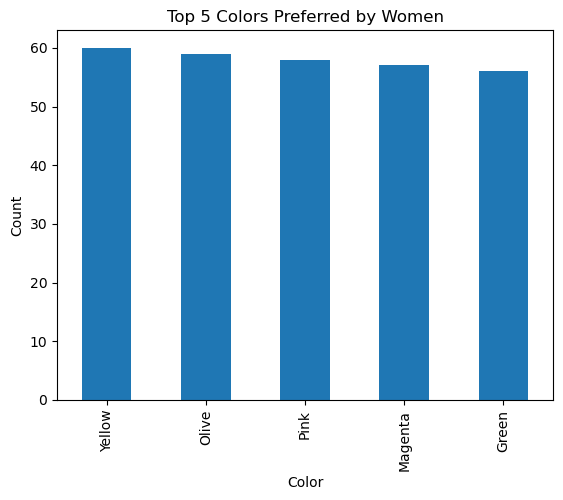

In [34]:
women_data = data[data['Gender'] == 'Female']

top_colors_women = women_data['Color'].value_counts().nlargest(5)
top_colors_women.plot(kind='bar')
plt.title("Top 5 Colors Preferred by Women")
plt.xlabel("Color")
plt.ylabel("Count")
plt.show()



## Que18:- Which top 5 locations are purchase more?

In [35]:
location_purchase_amount = data.groupby('Location')['Purchase Amount (USD)'].sum()
top_5_locations = location_purchase_amount.nlargest(5)

print("Top 5 Locations by Purchased Amount:")
print(top_5_locations)



Top 5 Locations by Purchased Amount:
Location
Montana       5784
Illinois      5617
California    5605
Idaho         5587
Nevada        5514
Name: Purchase Amount (USD), dtype: int64


## Que19:- Which Age Category have Subscription.

Age Group  Subscription Status
0-18       0                       55
           1                       14
19-25      0                      366
           1                      136
26-35      0                      546
           1                      196
36-45      0                      537
           1                      192
46-55      0                      524
           1                      229
56-65      0                      552
           1                      198
66+        0                      267
           1                       88
Name: Subscription Status, dtype: int64


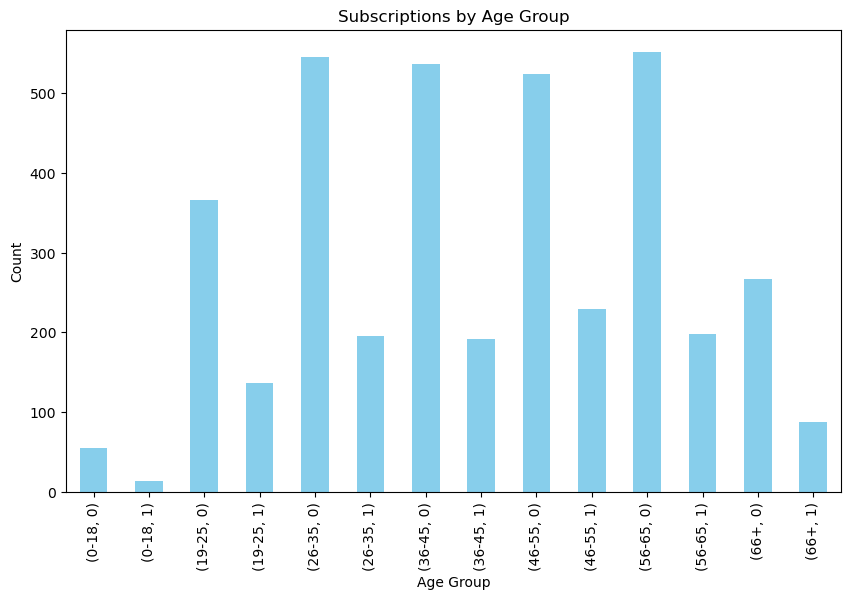

In [199]:
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_subscription_counts = data.groupby('Age Group')['Subscription Status'].value_counts()

print(age_subscription_counts)

plt.figure(figsize=(10, 6)) 
age_subscription_counts.plot(kind='bar', color='skyblue')
plt.title("Subscriptions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

## Que20:- Season wise Purchasing amount by category 

Season        Fall  Spring  Summer  Winter
Category                                  
Accessories  19874   17007   19028   18291
Clothing     26220   27692   23078   27274
Footwear      8665    9555    9393    8480
Outerwear     5259    4425    4278    4562


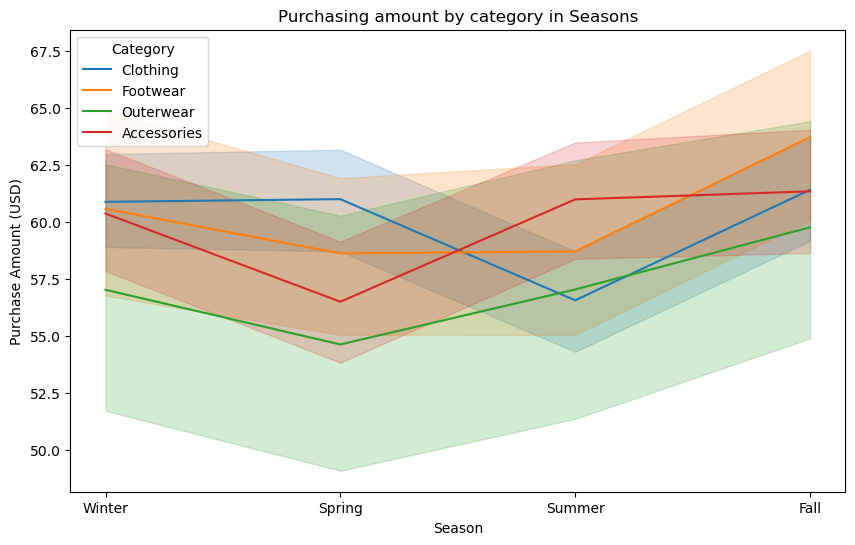

In [203]:
pivot_table = data.pivot_table(index="Category", columns="Season", values="Purchase Amount (USD)", aggfunc="sum", fill_value=0)

print(pivot_table)

plt.figure(figsize=(10, 6)) 
sns.lineplot(x='Season', y='Purchase Amount (USD)', hue='Category', data=data)
plt.title("Purchasing amount by category in Seasons")
plt.show()